# 다항 특성 (Polynomial Features)

## 학습 목표
1. **다항 특성(Polynomial Features)**의 개념과 필요성을 이해할 수 있다
2. **PolynomialFeatures**를 사용하여 비선형 특성을 생성할 수 있다
3. 선형 모델로 **비선형 관계**를 학습하는 방법을 이해할 수 있다
4. **다항 회귀(Polynomial Regression)**를 구현할 수 있다
5. 차수(degree) 선택과 **과적합** 문제를 이해할 수 있다

## 주요 내용
- 선형 모델의 한계와 다항 특성의 필요성
- PolynomialFeatures 사용법
- 다항 회귀 모델 구현
- degree 파라미터에 따른 모델 복잡도
- 과적합 방지를 위한 정규화 기법

본 코드는 아래 사이트의 내용을 참조 하였습니다. <br>
https://inuplace.tistory.com/515

다항선형회귀 : x의 갯수가 2개이상인 경우 <br>
y = w1*x1 + w2*x2 + w0

y = x^2 + w*x + c

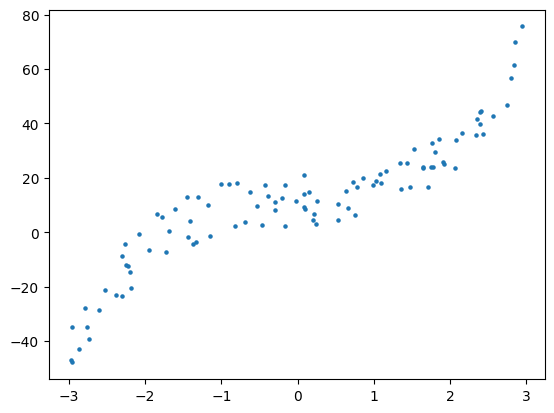

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
randNum = np.random.rand(n, 1)
x = 6  *randNum -3

y = 2 * x**3 + x + 2 + (np.random.rand(n, 1)*20)

plt.scatter(x, y, s=5)

위와 같은 데이터는 데이터의 분포가 곡선으로 나타나기 때문에 일반적인 선형회귀로 해결할 수 없다. (비선형)
따라서 PolynominalFeatures를 사용한다. PolynominalFeatures는 위의 그래프와 같이 데이터들간의 형태가 비선형 일때 데이터에 각 특성의 제곱항들을 추가해주어서 특성이 추가된 비선형 데이터를 **다항 회귀 모델**로 훈련시키는 방법이다.
<br>

Feature가 2개인 경우를 생각해 보자. 일반적은 다중 선형 모델일 경우 아래와 같을 것이다. <br>
$$y=w_{1}*x_{1}+w_{2}*x_{2} + w_{0} $$
<br>

이를 PolynominalFeatures를 활용할 경우, 아래와 같은 Feature를 추가해 주기 때문에 2차 함수의 모델을 만들어 낼 수 있다. <br>
 $$ x_{1}^2, x_{2}^2, x_{1}*x_{2} $$  <br>
$$y=w_{1}*x_{1}^2+w_{2}*x_{2}^2+w_{3}*x_{1}*x_{2}+w_{4}*x_{1}+w_{5}*x_{2} + w_{0} $$

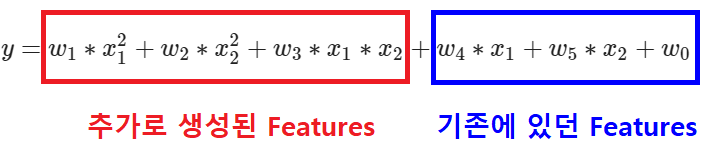

* PolynomialFeatures함수를 통해 현재 데이터를 다항식 형태로 변경한다. (각 특성의 제곱 혹은 그 이상을 추가)
* degree 옵션으로 차수를 조절한다.
* include_bias 옵션은 True로 할 경우 0차항(1)도 함께 만든다.
* 이렇게 만들어진 다항식 모델에 x를 fit transform하여 새로운 데이터를 생성한다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 입력 Feature를 2차함수로 생성하기 위해 2차항 추가
# include_bias=False는 절편을 제외한다. degree=3 ->위의 그래프 그려보고 3차함수구나 생각하고 여기에 3 넣기.[x, x^2, x^3]
poly_features = PolynomialFeatures(degree=3, include_bias=False) # 기본 다항식형태를 만들고
x_poly = poly_features.fit_transform(x)
# 새롭게 정의된 numpy 배열은 행별로 각 데이터를 다항 형태로 변형해준다

In [3]:
# x[0]을 출력
print(x[0])

# x[0]항과 x[0]^2 제곱항을 출력
print(x_poly[0])

[0.20430884]
[0.20430884 0.0417421  0.00852828]


In [4]:
x, x_poly

(array([[ 0.20430884],
        [-0.19849936],
        [-0.01683358],
        [ 0.52936113],
        [ 1.85623334],
        [ 2.94689255],
        [ 0.1537428 ],
        [-2.96194483],
        [-0.29834635],
        [ 0.09053965],
        [ 2.74141133],
        [-1.83685703],
        [-0.39018513],
        [ 1.09811505],
        [ 1.90684288],
        [ 1.92292935],
        [-0.42639411],
        [-1.1773792 ],
        [ 1.47292334],
        [-0.62813118],
        [-2.08214393],
        [-2.22586774],
        [-0.46431067],
        [-2.79184206],
        [ 1.64264666],
        [ 2.83969147],
        [ 1.80806478],
        [-1.60416335],
        [-1.68159267],
        [ 2.38777322],
        [-1.72041004],
        [ 0.75747342],
        [ 0.2500783 ],
        [-1.94979276],
        [ 1.52126774],
        [-2.96592748],
        [ 1.77976269],
        [-0.16152859],
        [ 1.03468354],
        [-2.18407403],
        [-2.52931018],
        [ 0.21204338],
        [-2.87210998],
        [-2

In [5]:
# 만약 입력되는 x에 PolynomialFeatures함수를 거쳐서 입력하면 모델의 차수를 조정해서 모델링을 할 수 있다.

from sklearn.linear_model import LinearRegression
# model.coef_, model.intercept_
model = LinearRegression()
model.fit(x_poly, y) # 다항회귀 모델에 그렇게 변형한 데이터와 기존 y값을 넣고 학습시킨다.

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [6]:
model.coef_

array([[1.25638579, 0.00284432, 1.99677667]])

## PipeLine 생성

In [7]:
# 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
from sklearn.pipeline import make_pipeline   

model_lr = make_pipeline(PolynomialFeatures(degree=3, include_bias=False),
                         LinearRegression())
model_lr.fit(x, y)
print(model_lr.steps[1][1].coef_)

[[1.25638579 0.00284432 1.99677667]]


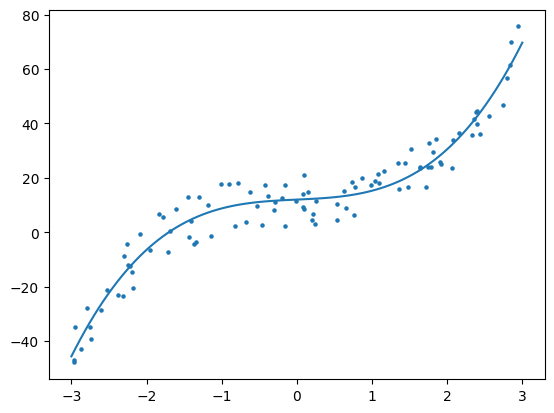

In [8]:
# 다항회귀 그래프
xx = np.linspace(-3, 3, 100)
y_pred = model_lr.predict(xx[:, np.newaxis])
plt.plot(xx, y_pred)
plt.scatter(x, y, s=5)